In [33]:
# import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import numpy as np

In [34]:
# import dataset
from tensorflow.keras.datasets import boston_housing

In [35]:
# load the data 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [36]:
# The Boston Housing dataset contains information about housing 
# prices in the Boston area. It includes features such as crime rate, 
# average number of rooms per dwelling, and more. 

In [37]:
# import libraries 
from sklearn.model_selection import train_test_split

In [38]:
# split the data into 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets, test_size=0.2, random_state=42)

In [39]:
# print the shapes of the resulting datasets. 
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Test targets shape: {y_test.shape}")

Training data shape: (323, 13)
Test data shape: (81, 13)
Training targets shape: (323,)
Test targets shape: (81,)


In [40]:
# training data shape describes the number of samples (data points) and the number
# of features (variables) in the training dataset. 
# we have 323 houses and 13 features for each house in this dataset. 

In [41]:
# test data shape 
# refers to the dimensions or structure of the dataset used for evaluating
# the performance of a machine learning model. 
# we have 81 samples (houses) and 13 features (variables) 
# the 13 features are represented as columns in a tabular dataset. 

In [42]:
# import 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# create a sequential model 
model = Sequential()

In [43]:
# add layers to the model 
model.add(Dense(units=64, activation='relu', input_shape=(13,))) # input layer
model.add(Dense(units=32, activation='relu')) # hidden layer
model.add(Dense(units=1)) # output layer

In [44]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [45]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# train the model using the training data 
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=1)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/100
9/9 [==============================] - 2s 77ms/step - loss: 5629.6523 - mae: 72.5931 - val_loss: 1853.8164 - val_mae: 39.6232
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 851.4523 - mae: 25.3803 - val_loss: 493.9300 - val_mae: 18.6164
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 434.3161 - mae: 15.6758 - val_loss: 253.5272 - val_mae: 11.8537
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 179.7007 - mae: 10.1460 - val_loss: 111.0923 - val_mae: 7.8261
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 106.3310 - mae: 7.6354 - val_loss: 102.8487 - val_mae: 7.2383
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 94.4520 - mae: 7.2432 - val_loss: 88.6154 - val_mae: 6.9976
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 75.8074 - mae: 6.6490 - val_loss: 85.2497 - val_mae: 6.6919
Epoch 8/100
9/9 [==============================] - 0s 19m

In [47]:
# print results 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 31.0939
Test Mean Absolute Error (MAE): 4.2795


Epoch 1/100
9/9 [==============================] - 0s 30ms/step - loss: 40.6244 - mae: 4.6410 - val_loss: 45.5400 - val_mae: 4.4696
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 39.7604 - mae: 4.2582 - val_loss: 44.5454 - val_mae: 4.5010
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 41.3566 - mae: 4.8580 - val_loss: 44.5465 - val_mae: 4.4518
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 39.3227 - mae: 4.2956 - val_loss: 45.1548 - val_mae: 4.6415
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 39.6125 - mae: 4.6863 - val_loss: 44.7075 - val_mae: 4.4214
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 41.3608 - mae: 4.2639 - val_loss: 47.5866 - val_mae: 4.8399
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 40.8043 - mae: 4.8676 - val_loss: 43.9617 - val_mae: 4.6635
Epoch 8/100
9/9 [==============================] - 0s 17ms/step - loss: 42.3

<function matplotlib.pyplot.show(close=None, block=None)>

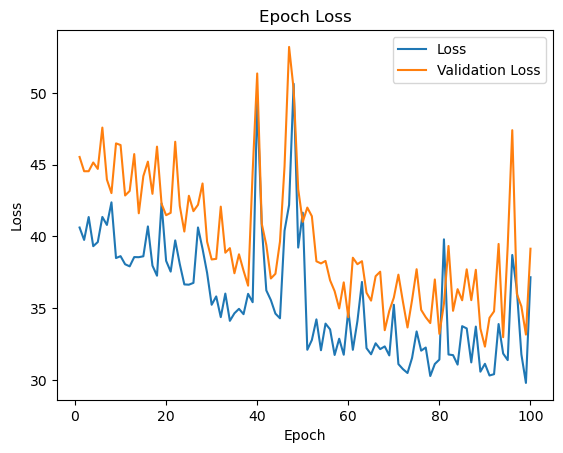

In [48]:
# graph 

hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

figure = plt.gcf()

plt.title('Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss'])+1), hist.history['loss']),
plt.plot(range(1, len(hist.history['val_loss'])+1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show
